In [1]:
from PIL import Image
import shutil
import pandas as pd
import numpy as np
import os
import random
import time
import copy
import cv2
import csv
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 받아오기
data = pd.read_excel('../MoldingSand2/Data/Preprocessing/1and2_remove.xlsx',engine='openpyxl',sheet_name='Sheet3')

# 데이터 추출
df = data[['GFD-6', 'GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
           'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture (% by wt)',
           'Percent M.B. Active Clay', 'AFS Clay Content (% <20 µm)', 'AFS Grain Fineness No.',
           'Compactability (%)', 'Green Comp. Strength (N/sq cm)', 'Permeability No.']]

# column 이름 바꾸기
df.columns = [['GFD-6', 'GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
                 'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture',
                'Active Clay', 'ASF Clay Content', 'AFS Grain Fineness No.',
                'Compactability', 'Green Comp. Strength', 'Permeability No.']]

data_1 = np.squeeze(df[['GFD-12']].to_numpy())
data_2 = np.squeeze(df[['GFD-20']].to_numpy())
data_3 = np.squeeze(df[['GFD-30']].to_numpy())
data_4 = np.squeeze(df[['GFD-40']].to_numpy())
data_5 = np.squeeze(df[['GFD-50']].to_numpy())
data_6 = np.squeeze(df[['GFD-70']].to_numpy())
data_7 = np.squeeze(df[['GFD-100']].to_numpy())
data_8 = np.squeeze(df[['GFD-140']].to_numpy())
data_9 = np.squeeze(df[['GFD-200']].to_numpy())
data_10 = np.squeeze(df[['GFD-270']].to_numpy())
data_11 = np.squeeze(df[['Pan']].to_numpy())
data_12 = np.squeeze(df[['Moisture']].to_numpy()) # 12 - 13 같이 들어가니까 Loss가 더 낮아짐
data_13 = np.squeeze(df[['Active Clay']].to_numpy()) # Loss를 낮추는데 역할을 한다!
data_14 = np.squeeze(df[['ASF Clay Content']].to_numpy())
data_15 = np.squeeze(df[['AFS Grain Fineness No.']].to_numpy())
data_16 = np.squeeze(df[['Compactability']].to_numpy())
data_17 = np.squeeze(df[['Green Comp. Strength']].to_numpy())
data_18 = np.squeeze(df[['Permeability No.']].to_numpy())

In [3]:
# 전체
all_data_x_0 = np.zeros((len(data_3),15))
all_data_x_0[:,0] = data_1
all_data_x_0[:,1] = data_2
all_data_x_0[:,2] = data_3
all_data_x_0[:,3] = data_4
all_data_x_0[:,4] = data_5
all_data_x_0[:,5] = data_6
all_data_x_0[:,6] = data_7
all_data_x_0[:,7] = data_8
all_data_x_0[:,8] = data_9
all_data_x_0[:,9] = data_10
all_data_x_0[:,10] = data_11
all_data_x_0[:,11] = data_12
all_data_x_0[:,12] = data_13
all_data_x_0[:,13] = data_14
all_data_x_0[:,14] = data_15


#########################output 1###################################
# 20제거
all_data_x_1 = np.zeros((len(data_3),14))
all_data_x_1[:,0] = data_1
all_data_x_1[:,1] = data_3
all_data_x_1[:,2] = data_4
all_data_x_1[:,3] = data_5
all_data_x_1[:,4] = data_6
all_data_x_1[:,5] = data_7
all_data_x_1[:,6] = data_8
all_data_x_1[:,7] = data_9
all_data_x_1[:,8] = data_10
all_data_x_1[:,9] = data_11
all_data_x_1[:,10] = data_12
all_data_x_1[:,11] = data_13
all_data_x_1[:,12] = data_14
all_data_x_1[:,13] = data_15

# # 20,12 제거
all_data_x_2 = np.zeros((len(data_3),13))
all_data_x_2[:,0] = data_3
all_data_x_2[:,1] = data_4
all_data_x_2[:,2] = data_5
all_data_x_2[:,3] = data_6
all_data_x_2[:,4] = data_7
all_data_x_2[:,5] = data_8
all_data_x_2[:,6] = data_9
all_data_x_2[:,7] = data_10
all_data_x_2[:,8] = data_11
all_data_x_2[:,9] = data_12
all_data_x_2[:,10] = data_13
all_data_x_2[:,11] = data_14
all_data_x_2[:,12] = data_15

# 20,12,30 제거
all_data_x_3 = np.zeros((len(data_3),12))
all_data_x_3[:,0] = data_4
all_data_x_3[:,1] = data_5
all_data_x_3[:,2] = data_6
all_data_x_3[:,3] = data_7
all_data_x_3[:,4] = data_8
all_data_x_3[:,5] = data_9
all_data_x_3[:,6] = data_10
all_data_x_3[:,7] = data_11
all_data_x_3[:,8] = data_12
all_data_x_3[:,9] = data_13
all_data_x_3[:,10] = data_14
all_data_x_3[:,11] = data_15

# 20,12,30,40 제거
all_data_x_4 = np.zeros((len(data_3),11))
all_data_x_4[:,0] = data_5
all_data_x_4[:,1] = data_6
all_data_x_4[:,2] = data_7
all_data_x_4[:,3] = data_8
all_data_x_4[:,4] = data_9
all_data_x_4[:,5] = data_10
all_data_x_4[:,6] = data_11
all_data_x_4[:,7] = data_12
all_data_x_4[:,8] = data_13
all_data_x_4[:,9] = data_14
all_data_x_4[:,10] = data_15

# 20,12,30,40,70 제거
all_data_x_5 = np.zeros((len(data_3),11))
all_data_x_5[:,0] = data_5
all_data_x_5[:,1] = data_7
all_data_x_5[:,2] = data_8
all_data_x_5[:,3] = data_9
all_data_x_5[:,4] = data_10
all_data_x_5[:,5] = data_11
all_data_x_5[:,6] = data_12
all_data_x_5[:,7] = data_13
all_data_x_5[:,8] = data_14
all_data_x_5[:,9] = data_15
##########################output2###############################
# 70제거
all_data_x_6 = np.zeros((len(data_3),14))
all_data_x_6[:,0] = data_1
all_data_x_6[:,1] = data_2
all_data_x_6[:,2] = data_3
all_data_x_6[:,3] = data_4
all_data_x_6[:,4] = data_5
all_data_x_6[:,5] = data_7
all_data_x_6[:,6] = data_8
all_data_x_6[:,7] = data_9
all_data_x_6[:,8] = data_10
all_data_x_6[:,9] = data_11
all_data_x_6[:,10] = data_12
all_data_x_6[:,11] = data_13
all_data_x_6[:,12] = data_14
all_data_x_6[:,13] = data_15
# 70, 20제거
all_data_x_7 = np.zeros((len(data_3),13))
all_data_x_7[:,0] = data_1
all_data_x_7[:,1] = data_3
all_data_x_7[:,2] = data_4
all_data_x_7[:,3] = data_5
all_data_x_7[:,4] = data_7
all_data_x_7[:,5] = data_8
all_data_x_7[:,6] = data_9
all_data_x_7[:,7] = data_10
all_data_x_7[:,8] = data_11
all_data_x_7[:,9] = data_12
all_data_x_7[:,10] = data_13
all_data_x_7[:,11] = data_14
all_data_x_7[:,12] = data_15
# 70, 20, 12제거
all_data_x_8 = np.zeros((len(data_3),12))
all_data_x_8[:,0] = data_3
all_data_x_8[:,1] = data_4
all_data_x_8[:,2] = data_5
all_data_x_8[:,3] = data_7
all_data_x_8[:,4] = data_8
all_data_x_8[:,5] = data_9
all_data_x_8[:,6] = data_10
all_data_x_8[:,7] = data_11
all_data_x_8[:,8] = data_12
all_data_x_8[:,9] = data_13
all_data_x_8[:,10] = data_14
all_data_x_8[:,11] = data_15
# 70, 20, 12, 40제거
all_data_x_9 = np.zeros((len(data_3),11))
all_data_x_9[:,0] = data_3
all_data_x_9[:,1] = data_5
all_data_x_9[:,2] = data_7
all_data_x_9[:,3] = data_8
all_data_x_9[:,4] = data_9
all_data_x_9[:,5] = data_10
all_data_x_9[:,6] = data_11
all_data_x_9[:,7] = data_12
all_data_x_9[:,8] = data_13
all_data_x_9[:,9] = data_14
all_data_x_9[:,10] = data_15

# 70, 20, 12, 40, 30제거
all_data_x_10 = np.zeros((len(data_3),10))
all_data_x_10[:,0] = data_5
all_data_x_10[:,1] = data_7
all_data_x_10[:,2] = data_8
all_data_x_10[:,3] = data_9
all_data_x_10[:,4] = data_10
all_data_x_10[:,5] = data_11
all_data_x_10[:,6] = data_12
all_data_x_10[:,7] = data_13
all_data_x_10[:,8] = data_14
all_data_x_10[:,9] = data_15

# all_data_x_11 = np.zeros((len(data_3),9))
# all_data_x_11[:,0] = data_1
# all_data_x_11[:,1] = data_7
# all_data_x_11[:,2] = data_8
# all_data_x_11[:,3] = data_9
# all_data_x_11[:,4] = data_11
# all_data_x_11[:,5] = data_12
# all_data_x_11[:,6] = data_13
# all_data_x_11[:,7] = data_14
# all_data_x_11[:,8] = data_15
###########################output3##############################
# 20 제거
all_data_x_12 = np.zeros((len(data_3),14))
all_data_x_12[:,0] = data_1
all_data_x_12[:,1] = data_3
all_data_x_12[:,2] = data_4
all_data_x_12[:,3] = data_5
all_data_x_12[:,4] = data_6
all_data_x_12[:,5] = data_7
all_data_x_12[:,6] = data_8
all_data_x_12[:,7] = data_9
all_data_x_12[:,8] = data_10
all_data_x_12[:,9] = data_11
all_data_x_12[:,10] = data_12
all_data_x_12[:,11] = data_13
all_data_x_12[:,12] = data_14
all_data_x_12[:,13] = data_15
# 20, 12 제거
all_data_x_13 = np.zeros((len(data_3),13))
all_data_x_13[:,0] = data_3
all_data_x_13[:,1] = data_4
all_data_x_13[:,2] = data_5
all_data_x_13[:,3] = data_6
all_data_x_13[:,4] = data_7
all_data_x_13[:,5] = data_8
all_data_x_13[:,6] = data_9
all_data_x_13[:,7] = data_10
all_data_x_13[:,8] = data_11
all_data_x_13[:,9] = data_12
all_data_x_13[:,10] = data_13
all_data_x_13[:,11] = data_14
all_data_x_13[:,12] = data_15
# 20, 12, 40 제거
all_data_x_14 = np.zeros((len(data_3),12))
all_data_x_14[:,0] = data_3
all_data_x_14[:,1] = data_5
all_data_x_14[:,2] = data_6
all_data_x_14[:,3] = data_7
all_data_x_14[:,4] = data_8
all_data_x_14[:,5] = data_9
all_data_x_14[:,6] = data_10
all_data_x_14[:,7] = data_11
all_data_x_14[:,8] = data_12
all_data_x_14[:,9] = data_13
all_data_x_14[:,10] = data_14
all_data_x_14[:,11] = data_15
# 20, 12, 40, 140 제거
all_data_x_15 = np.zeros((len(data_3),11))
all_data_x_15[:,0] = data_3
all_data_x_15[:,1] = data_5
all_data_x_15[:,2] = data_6
all_data_x_15[:,3] = data_7
all_data_x_15[:,4] = data_9
all_data_x_15[:,5] = data_10
all_data_x_15[:,6] = data_11
all_data_x_15[:,7] = data_12
all_data_x_15[:,8] = data_13
all_data_x_15[:,9] = data_14
all_data_x_15[:,10] = data_15
# 20, 12, 40, 140, 200 제거
all_data_x_16 = np.zeros((len(data_3),10))
all_data_x_16[:,0] = data_3
all_data_x_16[:,1] = data_5
all_data_x_16[:,2] = data_6
all_data_x_16[:,3] = data_7
all_data_x_16[:,4] = data_10
all_data_x_16[:,5] = data_11
all_data_x_16[:,6] = data_12
all_data_x_16[:,7] = data_13
all_data_x_16[:,8] = data_14
all_data_x_16[:,9] = data_15

# all_data_x_17 = np.zeros((len(data_3),9))
# all_data_x_17[:,0] = data_3
# all_data_x_17[:,1] = data_5
# all_data_x_17[:,2] = data_7
# all_data_x_17[:,3] = data_9
# all_data_x_17[:,4] = data_10
# all_data_x_17[:,5] = data_11
# all_data_x_17[:,6] = data_12
# all_data_x_17[:,7] = data_14
# all_data_x_17[:,8] = data_15

In [5]:
all_data_x_18 = np.zeros((len(data_3),12))
all_data_x_18[:,0] = data_4
all_data_x_18[:,1] = data_5
all_data_x_18[:,2] = data_6
all_data_x_18[:,3] = data_7
all_data_x_18[:,4] = data_8
all_data_x_18[:,5] = data_9
all_data_x_18[:,6] = data_10
all_data_x_18[:,7] = data_11
all_data_x_18[:,8] = data_12
all_data_x_18[:,9] = data_13
all_data_x_18[:,10] = data_14
all_data_x_18[:,11] = data_15

all_data_x_19 = np.zeros((len(data_3),10))
all_data_x_19[:,0] = data_4
all_data_x_19[:,1] = data_5
all_data_x_19[:,2] = data_6
all_data_x_19[:,3] = data_7
all_data_x_19[:,4] = data_8
all_data_x_19[:,5] = data_9
all_data_x_19[:,6] = data_12
all_data_x_19[:,7] = data_13
all_data_x_19[:,8] = data_14
all_data_x_19[:,9] = data_15

all_data_x_20 = np.zeros((len(data_3),13))
all_data_x_20[:,0] = data_3
all_data_x_20[:,1] = data_4
all_data_x_20[:,2] = data_5
all_data_x_20[:,3] = data_6
all_data_x_20[:,4] = data_7
all_data_x_20[:,5] = data_8
all_data_x_20[:,6] = data_9
all_data_x_20[:,7] = data_10
all_data_x_20[:,8] = data_11
all_data_x_20[:,9] = data_12
all_data_x_20[:,10] = data_13
all_data_x_20[:,11] = data_14
all_data_x_20[:,12] = data_15

In [7]:
# input_set_1 = [all_data_x_0, all_data_x_1, all_data_x_2, all_data_x_3, all_data_x_4, all_data_x_5]
# input_set_2 = [all_data_x_0, all_data_x_6, all_data_x_7, all_data_x_8, all_data_x_9, all_data_x_10]
# input_set_3 = [all_data_x_0, all_data_x_12, all_data_x_13, all_data_x_14, all_data_x_15, all_data_x_16]

input_set_1 = [all_data_x_18]
input_set_2 = [all_data_x_19]
input_set_3 = [all_data_x_20]

input_set = [input_set_1, input_set_2, input_set_3]
all_data_y = np.zeros((len(data_13),))
cnt_y = 0

for input_s in input_set:
    
    if cnt_y == 0:
        all_data_y = data_16
        string = 'Compactability_'
    elif cnt_y == 1:
        all_data_y = data_17
        string = 'Strength_'
    elif cnt_y == 2:
        all_data_y = data_18
        string = 'Permeability_'
    
    cnt = 0
    
    
    for all_data_x in input_s:
        np.random.seed(5)
        index = np.arange(0, all_data_x.shape[0])
        np.random.shuffle(index)
        
        all_data_x = all_data_x[index]      
        if cnt == 0:
            all_data_y = all_data_y[index]
        
        x_train_, x_test_, y_train_, y_test_ = train_test_split(all_data_x, all_data_y, shuffle = False, test_size = 0.2) 
        
        mean_x = np.mean(x_train_, axis = 0)   
        std_x = np.std(x_train_, axis = 0)   

        x_train_ = (x_train_ - mean_x) / std_x
        x_test_ = (x_test_ - mean_x) / std_x
    
        x_train = x_train_.copy()
        x_test = x_test_.copy()
        y_train = y_train_.copy()
        y_test = y_test_.copy()
        
        ##########################################################################################
        model = XGBRegressor()
        model_param_grid = {'n_estimators' : [150 ,200, 250, 300, 350, 400, 450, 500, 550, 600],
                            'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
                            'max_depth' : [3, 4, 5, 6, 7 ,8, 9, 10],
                            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                           }

        model_grid = GridSearchCV(model,
                                  param_grid = model_param_grid,
                                  scoring = 'neg_mean_absolute_error',
                                  n_jobs = -1,
                                  verbose = 2,
                                  cv = 5,
                                  refit = True
                                 )

        model_grid.fit(x_train, y_train)
        ##########################################################################################
        model_grid_df = pd.DataFrame(model_grid.cv_results_)
        model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]
        
        top_list = []
        score_list = []
        for i in range(2880):
            if model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['rank_test_score'][i] < 28:
                top_list.append(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['params'][i])
                score_list.append(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['mean_test_score'][i])
                
        top_score =[]
        
        file_name = 'XGBoost_'+ string + str(cnt) + '.csv' 
        f = open(file_name,'w', newline='')
        wr = csv.writer(f)
        wr.writerow(['learning_rate', 'max_depth', 'n_estimators', 'subsample', 'val_MAE', 'test_MAE'])

        val_cnt = 0
        for i in top_list:
            val_mae = abs(score_list[val_cnt])
            
            model_test = XGBRegressor(learning_rate =  i['learning_rate'],
                                      max_depth =  i['max_depth'],
                                      n_estimators =  i['n_estimators'],
                                      subsample =  i['subsample']
                                     )
            model_test.fit(x_train, y_train)

            y_pred = model_test.predict(x_test)
            y_true = y_test

            mae = mean_absolute_error(y_true, y_pred) 
            top_score.append(mae)

            wr.writerow([i['learning_rate'], i['max_depth'], i['n_estimators'], i['subsample'], val_mae, mae])
            val_cnt += 1
            
        string_mean = np.mean(np.array(top_score))
        string_std = np.std(np.array(top_score))
        wr.writerow([string_mean, string_std])

        cnt += 1
        f.close()
    cnt_y += 1
        

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 325 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1673 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 2258 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 2785 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 3392 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 4081 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 4850 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 5701 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7645 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8738 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 10126 tasks     

[10:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 2506 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 3396 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 4345 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6362 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7900 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9602 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 11464 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 13490 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:  2.6min finished


[10:43:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 2167 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 2618 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 3145 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 3752 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 4441 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5210 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6061 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6992 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8005 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9098 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10846 tasks    

[10:47:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

output 1에 대해서 

Original: 1.82, 0.04
GFD-40feature제거: 1.82
GFD-40, GFD-12 feature제거: 1.81
GFD-40, GFD-12, GFD-30 feature제거: 1.73, 0.08
GFD-40, GFD-12, GFD-30, GFD-200 feature제거: 1.82 

output 2에 대해서 

Original:  Top 36 : 0.54, std 0.01 
GFD-12, GFD-20, GFD-40, GFD-70 feature제거: Top 36 : 0.55, std 0.02 
GFD-12, GFD-20, GFD-40, GFD-70, GFD-50 feature제거: Top 36 : 0.55, std 0.02
GFD-12, GFD-20, GFD-40, GFD-70, GFD-30 feature제거: Top 36 : 0.52, std 0.03 (Variance 보고 결정)
GFD-12, GFD-20, GFD-40, GFD-70, GFD-50, GFD-30 feature제거: Top 36 : 0.52, std 0.02
GFD-12, GFD-20, GFD-40, GFD-70, GFD-50, GFD-30, GFD-100 feature제거: Top 36 : 0.52, std 0.001
GFD-12, GFD-20, GFD-40, GFD-70, GFD-50, GFD-30, GFD-100, GFD-270 feature제거: Top 36 : 0.53, std 0.02 
GFD-12, GFD-20, GFD-40, GFD-70, GFD-50, GFD-30, GFD-100, GFD-270, GFN feature제거: Top 36 : , std 

output 3에 대해서 

Original:  Top 36 : 5.08, std 0.2
GFD-20 feature제거: Top 36 : 5.11 ,std 0.17
GFD-20, GFD-12 feature제거: Top 36 : 5.13 ,std 0.15
GFD-20, GFD-12, GFD-40 feature제거: Top 36 : 5.02 ,std 0.18
GFD-20, GFD-12, GFD-40, GFD-140 feature제거: Top 36 : 4.96 ,std 0.12
GFD-20, GFD-12, GFD-40, GFD-140, GFD-200 feature제거: Top 36 : 4.94, std 0.14
GFD-20, GFD-12, GFD-40, GFD-140, GFD-200, Active-Clay feature제거: Top 36 : 5.12, std 0.11

In [5]:
all_data_y = np.zeros((len(data_13),))
all_data_y = data_16

np.random.seed(5)
index = np.arange(0, all_data_x_1.shape[0])
np.random.shuffle(index)
all_data_x_1 = all_data_x_1[index]
all_data_y = all_data_y[index]

########################################################
x_train, x_test, y_train, y_test = train_test_split(all_data_x_1, all_data_y, shuffle = False, test_size = 0.2) 

print(x_train.shape) 
print(type(x_train)) 
print(y_train.shape) 
print(type(y_train)) 

(267, 14)
<class 'numpy.ndarray'>
(267,)
<class 'numpy.ndarray'>


In [35]:
# var_ = np.zeros((15,),dtype = float)
# var_[0] = np.var(x_train[:,0])
# var_[1] = np.var(x_train[:,1])
# var_[2] = np.var(x_train[:,2])
# var_[3] = np.var(x_train[:,3])
# var_[4] = np.var(x_train[:,4])
# var_[5] = np.var(x_train[:,5])
# var_[6] = np.var(x_train[:,6])
# var_[7] = np.var(x_train[:,7])
# var_[8] = np.var(x_train[:,8])
# var_[9] = np.var(x_train[:,9])
# var_[10] = np.var(x_train[:,10])
# var_[11] = np.var(x_train[:,11])
# var_[12] = np.var(x_train[:,12])
# var_[13] = np.var(x_train[:,13])
# var_[14]= np.var(x_train[:,14])

# np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.5f}".format(x)})
# print(var_)

In [6]:
mean_x = np.mean(x_train, axis = 0)   
std_x = np.std(x_train, axis = 0)   

mean_y = np.mean(y_train, axis = 0)   
std_y = np.std(y_train, axis = 0)   

In [7]:
x_train = (x_train - mean_x) / std_x
# y_train = (y_train - mean_y) / std_y

x_test = (x_test - mean_x) / std_x

# Mutual Information

In [1]:
# from sklearn.feature_selection import mutual_info_regression

# X = x_train
# y = y_train # -3, -2, -1에 대해서 각각 MI비교

# discrete_features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features = 'auto',n_neighbors=5)
    
#     mi_scores = pd.Series(mi_scores,
#                           name="MI Scores",
#                           index=['GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
#                                  'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture',
#                                  'Active Clay', 'Clay Content', 'AFS GFN'])
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# print(mi_scores)

# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.xlabel('Mutual Information', fontsize = 13)
#     plt.title("Compactability")
# #     plt.title("Strength")
# #     plt.title("Permeability No.")
    
# plt.figure(dpi=100, figsize=(8, 5))

# plot_mi_scores(mi_scores)

In [8]:
model = XGBRegressor()
model_param_grid = {'n_estimators' : [150 ,200, 250, 300, 350, 400, 450, 500, 550, 600],
                    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
                    'max_depth' : [3, 4, 5, 6, 7 ,8, 9, 10],
                    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                   }

model_grid = GridSearchCV(model,
                          param_grid = model_param_grid,
                          scoring = 'neg_mean_absolute_error',
                          n_jobs = -1,
                          verbose = 2,
                          cv = 5,
                          refit = True
                         )

model_grid.fit(x_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 325 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1269 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1766 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 2558 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 3085 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 3692 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 4381 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5150 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6001 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6932 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7945 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9038 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10213 tasks     

[13:24:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:  3.0min finished


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [150, 200, 250, 300, 350, 400, 450,
                                          500, 550, 600],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [9]:
model_grid_df = pd.DataFrame(model_grid.cv_results_)
# model_grid_df.loc[:, ['mean_test_score', "params"]]
model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]

,mean_test_score,rank_test_score,params
0,-4.245213,2873,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
1,-4.235027,2872,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
2,-4.227162,2857,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
3,-4.220812,2849,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
4,-4.216170,2841,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
...,...,...,...
2875,-0.651689,2453,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."
2876,-0.648700,2435,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."
2877,-0.639332,2299,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."
2878,-0.647597,2424,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."


In [11]:
top_list =[]
for i in range(2880):
    if model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['rank_test_score'][i] < 28:
#         print(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['rank_test_score'][i])
#         print(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['params'][i])
#         print(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['mean_test_score'][i])
        top_list.append(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['params'][i])

In [12]:
top_score =[]

f = open('XGBoost_output1_no3.csv','w', newline='')
wr = csv.writer(f)
wr.writerow(['learning_rate', 'max_depth', 'n_estimators', 'subsample', 'MAE'])

for i in top_list:
    model_test = XGBRegressor(learning_rate =  i['learning_rate'],
                              max_depth =  i['max_depth'],
                              n_estimators =  i['n_estimators'],
                              subsample =  i['subsample']
                             )
    model_test.fit(x_train, y_train)
    
    y_pred = model_test.predict(x_test)
    y_true = y_test

    mae = mean_absolute_error(y_true, y_pred) 
    top_score.append(mae)
    
    wr.writerow([i['learning_rate'], i['max_depth'], i['n_estimators'], i['subsample'], mae])
    
print(np.mean(np.array(top_score)))
print(np.std(np.array(top_score)))
f.close()

[13:29:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [179]:
# for all feature
# model_test = XGBRegressor(learning_rate = 0.3,
#                           max_depth = 4,
#                           n_estimators = 200,
#                           subsample = 1.0
#                          )

# model_test.fit(x_train, y_train)

[15:00:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=500, subsample=1.0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

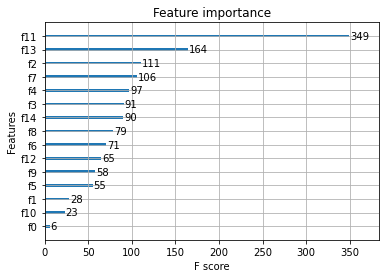

In [180]:
plot_importance(model_test)

In [181]:
y_pred = model_test.predict(x_test)
y_true = y_test

mae = mean_absolute_error(y_true, y_pred) 

print('mae: ', mae) 

mae:  1.9014611600050286


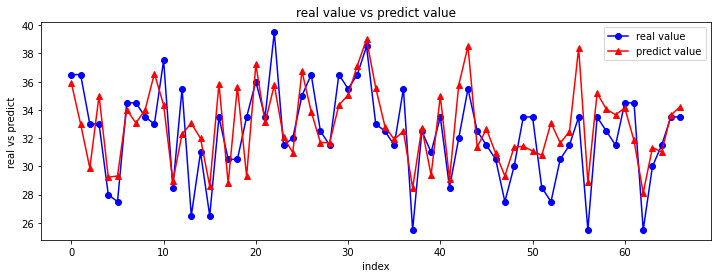

In [56]:
fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_true, marker='o', color='blue', label='real value')
chart.plot(y_pred, marker='^', color='red', label='predict value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best')

In [ ]:
compact_mean = [1.82, 1.87, 1.81, 1.74, 1.92, 1.76 ]
compact_std = [0.04, 0.05, 0.02, 0.03, 0.09, 0.02 ]

In [ ]:
strength_mean = [0.53, 0.51, 0.55, 0.53, 0.55, 0.50 ]
strength_std = [0.007, 0.01, 0.02, 0.02, 0.02, 0.03 ]

In [ ]:
permeability_mean = [5.09, 5.27, 5.18, 5.08, 4.84, 4.91 ]
permeability_std = [0.12, 0.15, 0.14, 0.17, 0.08, 0.12 ]